<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/6_sierra_vergara/sierra_mezcla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Aplicaciones  

Un tipo de problema que se puede describir en términos de una ecuación diferencial involucra mezclas químicas, como se ilustra en el siguiente ejemplo.  

El proximo ejemplo es tomado de la página 455 del Larson. 

## EJEMPLO 4 Un problema de mezcla

Un tanque contiene 50 galones de una disolución compuesta por 90% agua y 10% alcohol.  

Una segunda disolución que contiene 50% agua y 50% alcohol se agrega al tanque a una tasa de 4 galones por minuto. Conforme se añade la segunda, el tanque empieza a drenar a una tasa de 5 galones por minuto, como se muestra en la figura 6.21.   

Si se supone que la disolución en el tanque se agita constantemente, ¿cuánto alcohol permanecerá en el tanque después de 10 minutos?

<img src = 'https://github.com/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/6_sierra_vergara/figura_6_21.jpg?raw=true'>

## Resuelva analíticamente el PVI que modela el problema de mezclas asignado: 

Sea $y$ el número de galones de alcohol en el tanque en cualquier instante $t$. 

Se sabe que $y = 5$ cuando $t = 0$.

Como la diferencia entre lo que entra y lo que sale del tanque es de $1$ galón por minuto, entonces 

La función que modela el volumen de líquido en la mezcla en cada instante es lineal (tasa de decrecimiento constante) 

$$ \text{número de galones en cada instante es} = -1(t) + 50 = 50 - t $$


Dado que el número de galones en el tanque en cualquier tiempo es $50 - t$, y que el tanque pierde 5 galones por minuto, se debe perder $[5/(50 - t)]y$ galones de alcohol por minuto. 

Además, ya que el tanque gana 2 galones de alcohol por minuto, el ritmo o velocidad de cambio de alcohol en el tanque está dada por  

$$ \frac{dy}{dt} = 2 - \left( \frac{5}{50 - t} \right)y \ \ \ \ \ \ \ \Rightarrow \ \ \ \  \ \ \ \frac{dy}{dt} + \left( \frac{5}{50 - t} \right)y = 2  $$



Para resolver esta ecuación diferencial sea $p(t) = \frac{5}{50 - t}$ 

# Resuelva y verifique con sympy el PVI y redacte una conclusión verbal donde compare la solución hallada analíticamente con la solución hallada con la librería de cálculo simbólico sympy.  

In [1]:
from sympy import var, Function, Eq, ode_order, classify_ode, diff, dsolve, solvers, checkodesol 

In [2]:
t,y = var('t y') # definición de las variables simbólicas 


In [4]:
y = Function('y')   # establecer la relación funcional entre t y y

In [6]:
ecuacion_dif = Eq(diff(y(t), t) + (5/(50 - t))*y(t) - 2, 0)

## Determine el orden de la ED utilizando la función `ode_order` de sympy

In [7]:
ode_order(ecuacion_dif, y(t))

1

## Clasifica la ecuación diferencial del problema de valor inicial dado

In [8]:
classify_ode(ecuacion_dif)

('factorable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 'linear_coefficients',
 '1st_power_series',
 'lie_group',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'linear_coefficients_Integral')

## Resuelve el PVI con sympy 

In [30]:
sol_gen_latex = dsolve(ecuacion_dif, y(t)) 
sol_gen_latex 

Eq(y(t), C1*t**5 - 250*C1*t**4 + 25000*C1*t**3 - 1250000*C1*t**2 + 31250000*C1*t - 312500000*C1 - t/2 + 25)

In [31]:
def sol_gen(t, C1 = 0):
    return C1*(t**5 - 250*t**4 + 25000*t**3 - 1250000*t**2 + 31250000*t - 312500000) - t/2 + 25

In [32]:
dsolve(ecuacion_dif, y(t), ics = {sol_gen_latex.lhs.subs(t,0):5})

Eq(y(t), t**5/15625000 - t**4/62500 + t**3/625 - 2*t**2/25 + 3*t/2 + 5)

In [33]:
def sol_pvi(t):
    return t**5/15625000 - t**4/62500 + t**3/625 - 2*t**2/25 + 3*t/2 + 5

## Describa y clasifique la solución del PVI

1.  
2.  
3.  

## Diga que tipo de funciones es la solución de la ED. 

**Sugerencia** 

`ics` is the set of initial conditions for the differential equation.

It should be given in the form of `{f(x0): x1, f(x).diff(x).subs(x, x2): x3}` and so on.   

For power series solutions, if no initial conditions are specified `f(0)` is assumed to be C0 and the power series solution is calculated about 0.


# Gráfica de la solución general de la ED usando matplotlib y la función interact del módulo ipywidgets para gráficos animados con deslizadores 

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 


def graficar_animado(C1 = 0):
    fig, ax = plt.subplots()
    T = np.linspace(0,12,300)
    Y = [sol_gen(t, C1 = C1*10**-8) for t in T]
    ax.plot(T,Y)
    ax.axis([0,12, -1,12])
    ax.grid(alpha = 0.6)

interact(graficar_animado, C1 = (5,8))    

plt.show() 

interactive(children=(IntSlider(value=5, description='C1', max=8, min=5), Output()), _dom_classes=('widget-int…

## Graficar la solución particular 

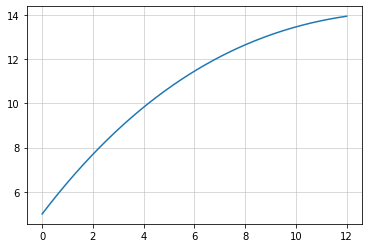

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

T = np.linspace(0,12, 300)
Y = [sol_pvi(t) for t in T]

plt.plot(T,Y)
plt.grid(alpha = 0.6) 

plt.show() 

## Observaciones e inferencias del grafico de la solución del PVI

1.  
2.  
3.  
4.  
5.  

## Referencias  

* Guí de ususario sobre solución de ODE con Sympy: https://docs.sympy.org/latest/modules/solvers/ode.html